In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

In [111]:
weather_df = pd.read_csv("../output_clusters/agroclimatic_clusters.csv")
weather_df.loc[weather_df["state"]=="delhi"]

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
342240,1958,1,21,22.4,9.0,35,0.7,delhi,delhi,1,7,11,11,18,0,1,15
342241,1958,2,3,24.0,9.7,22,-0.4,delhi,delhi,1,7,11,11,18,0,1,15
342242,1958,3,12,31.4,16.2,22,-0.5,delhi,delhi,1,7,11,11,18,0,1,15
342243,1958,4,1,38.5,22.9,8,-0.7,delhi,delhi,1,7,11,11,18,0,1,15
342244,1958,5,3,40.4,26.0,7,-1.0,delhi,delhi,1,7,11,11,18,0,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342979,2019,8,227,34.8,27.3,145,1.0,delhi,delhi,1,7,11,11,18,0,1,15
342980,2019,9,90,34.8,25.4,109,0.6,delhi,delhi,1,7,11,11,18,0,1,15
342981,2019,10,10,33.7,19.5,52,-1.4,delhi,delhi,1,7,11,11,18,0,1,15
342982,2019,11,22,30.0,13.4,38,-1.1,delhi,delhi,1,7,11,11,18,0,1,15


In [112]:
c15_3 = weather_df.loc[weather_df["state"]=="delhi"]

In [113]:
conditions = c15_3[['Year','Month','ppt(mm)', 'tmax(degC)', 'tmin(degC)', 'aet(mm)',
                        'PDSI(unitless)']]
conditions.shape

(744, 7)

In [114]:
conditions.isnull().sum(axis=0) #no nulls

Year              0
Month             0
ppt(mm)           0
tmax(degC)        0
tmin(degC)        0
aet(mm)           0
PDSI(unitless)    0
dtype: int64

In [115]:
conditions["ds"] = conditions["Month"].astype(str)+"-"+conditions["Year"].astype(str)
conditions.tail(50)

/home/susiejojo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),ds
342934,2015,11,2,28.8,14.7,11,-3.9,11-2015
342935,2015,12,1,22.8,9.2,7,-3.9,12-2015
342936,2016,1,2,22.4,8.4,6,-4.1,1-2016
342937,2016,2,3,26.6,11.9,6,-4.3,2-2016
342938,2016,3,25,32.3,17.3,26,-3.6,3-2016
342939,2016,4,4,38.2,23.2,5,-3.6,4-2016
342940,2016,5,13,41.2,27.4,14,-3.0,5-2016
342941,2016,6,24,40.4,29.8,25,-2.7,6-2016
342942,2016,7,292,35.4,28.0,145,-2.3,7-2016
342943,2016,8,165,33.9,27.0,133,-3.3,8-2016


In [116]:
conditions["Day"] = [1] * len(conditions["Month"])
conditions["ds"] = pd.to_datetime(conditions[['Year','Month',"Day"]])


/home/susiejojo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/susiejojo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [117]:
conditions["avg_temp"] = 0.5*(conditions["tmax(degC)"]+conditions["tmin(degC)"])
conditions.drop(columns=["tmax(degC)","tmin(degC)"],inplace=True)
conditions.tail()

/home/susiejojo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/susiejojo/.local/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,ppt(mm),aet(mm),PDSI(unitless),ds,Day,avg_temp
342979,2019,8,227,145,1.0,2019-08-01,1,31.05
342980,2019,9,90,109,0.6,2019-09-01,1,30.10
342981,2019,10,10,52,-1.4,2019-10-01,1,26.60
342982,2019,11,22,38,-1.1,2019-11-01,1,21.70
342983,2019,12,7,16,-1.0,2019-12-01,1,13.10


In [169]:
conditions_trunc = conditions.loc[(conditions["Year"]>1980) & (conditions["Year"]<2019)]
conditions_val = conditions.loc[conditions["Year"]==2019]
# conditions_trunc
train_final = conditions_trunc[["ds","ppt(mm)","avg_temp","aet(mm)"]]
train_final.rename(columns = {'ppt(mm)':'y'}, inplace = True) 
# train_final = train_ppt.tail(50)
train_final.reset_index(inplace=True)
train_final.drop(columns="index",inplace=True)
print (conditions_val.shape)
train_final

(12, 8)


/home/susiejojo/.local/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/susiejojo/.local/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y,avg_temp,aet(mm)
0,1981-01-01,30,14.25,34
1,1981-02-01,9,18.05,16
2,1981-03-01,26,21.70,30
3,1981-04-01,0,28.95,4
4,1981-05-01,8,33.05,10
...,...,...,...,...
451,2018-08-01,230,30.85,130
452,2018-09-01,165,29.40,118
453,2018-10-01,3,26.55,68
454,2018-11-01,12,21.35,45


In [170]:
conditions_val

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),ds,Day,avg_temp
342972,2019,1,28,33,2.3,2019-01-01,1,13.85
342973,2019,2,25,34,2.9,2019-02-01,1,16.30
342974,2019,3,10,23,2.7,2019-03-01,1,21.45
342975,2019,4,19,26,3.2,2019-04-01,1,29.25
342976,2019,5,5,10,2.6,2019-05-01,1,32.65
342977,2019,6,9,12,1.8,2019-06-01,1,34.35
342978,2019,7,205,158,1.5,2019-07-01,1,31.90
342979,2019,8,227,145,1.0,2019-08-01,1,31.05
342980,2019,9,90,109,0.6,2019-09-01,1,30.10
342981,2019,10,10,52,-1.4,2019-10-01,1,26.60


In [171]:
m = Prophet()
m.fit(train_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [172]:
future = m.make_future_dataframe(periods=13, freq='M')
# future['temp'] = future['ds'].apply(weather_temp)

In [173]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
464,2019-08-31,113.193691,52.325575,170.906097
465,2019-09-30,25.282216,-35.836836,78.116901
466,2019-10-31,12.039616,-43.960568,66.275297
467,2019-11-30,12.127140,-45.188037,67.998952
468,2019-12-31,21.390688,-33.091356,77.714554


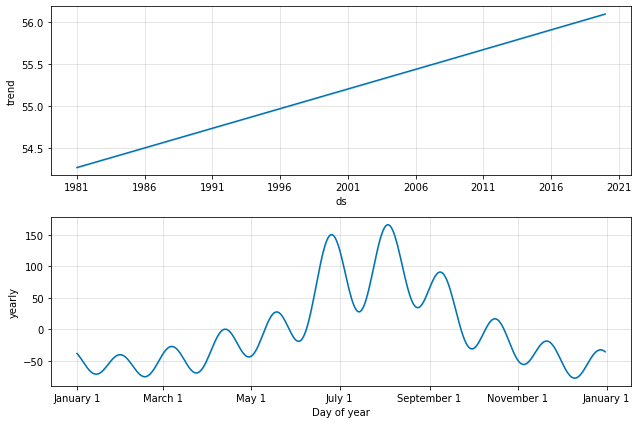

In [174]:
fig2 = m.plot_components(forecast)

In [175]:
forecast_2019 = forecast.tail(12)
forecast_2019["Month"] = forecast_2019["ds"].dt.month
print (forecast_2019[["yhat"]].shape,conditions_val[["ppt(mm)"]].shape)
test = pd.merge(conditions_val[["ppt(mm)","Month"]],forecast_2019[["yhat","Month"]])
# cols = ['ds','actual','yhat']
from sklearn.metrics import mean_squared_error
print (mean_squared_error(test["ppt(mm)"], test["yhat"]))
test

(12, 1) (12, 1)
4447.406555429825


/home/susiejojo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ppt(mm),Month,yhat
0,28,1,15.774200
1,25,2,10.428344
2,10,3,1.988503
3,19,4,12.165142
4,5,5,42.604397
5,9,6,193.394270
6,205,7,210.643199
7,227,8,113.193691
8,90,9,25.282216
9,10,10,12.039616


In [177]:
train_tfinal = conditions_trunc[["ds","avg_temp","ppt(mm)"]]
train_tfinal.rename(columns = {'avg_temp':'y'}, inplace = True) 
train_tfinal.reset_index(inplace=True)
train_tfinal.drop(columns="index",inplace=True)
train_tfinal

/home/susiejojo/.local/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/susiejojo/.local/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y,ppt(mm)
0,1981-01-01,14.25,30
1,1981-02-01,18.05,9
2,1981-03-01,21.70,26
3,1981-04-01,28.95,0
4,1981-05-01,33.05,8
...,...,...,...
451,2018-08-01,30.85,230
452,2018-09-01,29.40,165
453,2018-10-01,26.55,3
454,2018-11-01,21.35,12


In [178]:
conditions_re = train_tfinal.set_index('ds')
conditions_re.head()

,y,ppt(mm)
ds,,
1981-01-01,14.25,30
1981-02-01,18.05,9
1981-03-01,21.70,26
1981-04-01,28.95,0
1981-05-01,33.05,8


In [179]:
forecast.rename(columns = {'yhat':'ppt(mm)'}, inplace = True) 
ppt_df = pd.concat([conditions_re[['ppt(mm)']],forecast[['ppt(mm)']]], ignore_index=True)
ppt_df['ppt(mm)']

0       30.000000
1        9.000000
2       26.000000
3        0.000000
4        8.000000
          ...    
920    113.193691
921     25.282216
922     12.039616
923     12.127140
924     21.390688
Name: ppt(mm), Length: 925, dtype: float64

In [181]:
m1 = Prophet()
m1.add_regressor('ppt(mm)')
m1.fit(train_tfinal)
future1 = m1.make_future_dataframe(periods=13, freq='M')
future1['ppt(mm)'] = ppt_df['ppt(mm)']
forecast_t = m1.predict(future1)
forecast_t[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
464,2019-08-31,30.019202,28.824487,31.070694
465,2019-09-30,27.015507,25.838238,28.180376
466,2019-10-31,22.058668,20.849034,23.181981
467,2019-11-30,15.885949,14.729079,16.963757
468,2019-12-31,15.694130,14.500443,16.893871


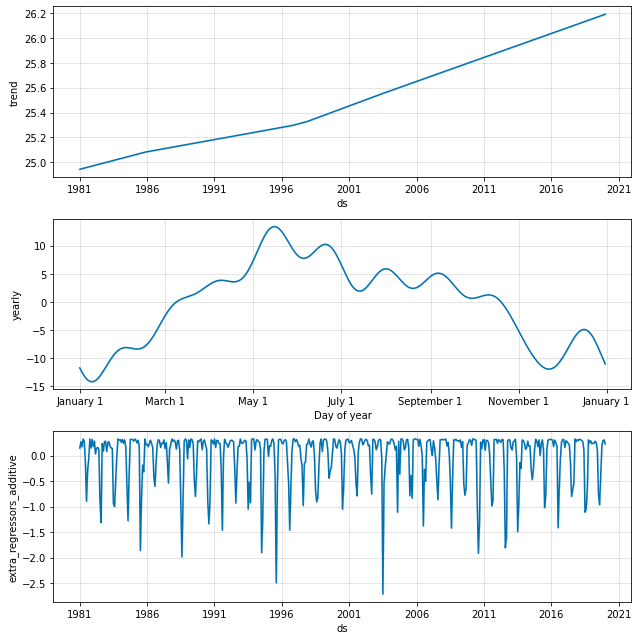

In [182]:
fig3 = m1.plot_components(forecast_t)

In [184]:
forecast_2019 = forecast_t.tail(12)
forecast_2019["Month"] = forecast_2019["ds"].dt.month
print (forecast_2019[["yhat"]].shape,conditions_val[["avg_temp"]].shape)
test = pd.merge(conditions_val[["avg_temp","Month"]],forecast_2019[["yhat","Month"]])
# cols = ['ds','actual','yhat']
from sklearn.metrics import mean_squared_error
print (mean_squared_error(test["avg_temp"], test["yhat"]))
test

/home/susiejojo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(12, 1) (12, 1)
18.56367381551725


,avg_temp,Month,yhat
0,13.85,1,18.214056
1,16.30,2,23.276022
2,21.45,3,29.326108
3,29.25,4,32.887488
4,32.65,5,34.944697
5,34.35,6,32.921736
6,31.90,7,31.033280
7,31.05,8,30.019202
8,30.10,9,27.015507
9,26.60,10,22.058668


In [187]:
train_afinal = conditions_trunc[["ds","aet(mm)","avg_temp","ppt(mm)"]]
train_afinal.rename(columns = {'aet(mm)':'y'}, inplace = True) 
train_afinal.reset_index(inplace=True)
train_afinal.drop(columns="index",inplace=True)
forecast_t.rename(columns = {'yhat':'avg_temp'}, inplace = True) 
temp_df = pd.concat([train_afinal[['avg_temp']],forecast_t[['avg_temp']]], ignore_index=True)
train_afinal

/home/susiejojo/.local/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/susiejojo/.local/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y,avg_temp,ppt(mm)
0,1981-01-01,34,14.25,30
1,1981-02-01,16,18.05,9
2,1981-03-01,30,21.70,26
3,1981-04-01,4,28.95,0
4,1981-05-01,10,33.05,8
...,...,...,...,...
451,2018-08-01,130,30.85,230
452,2018-09-01,118,29.40,165
453,2018-10-01,68,26.55,3
454,2018-11-01,45,21.35,12


In [188]:
m2 = Prophet()
m2.add_regressor('ppt(mm)')
m2.add_regressor('avg_temp')
m2.fit(train_afinal)
future2 = m2.make_future_dataframe(periods=13, freq='M')
future2['ppt(mm)'] = ppt_df['ppt(mm)']
future2['avg_temp'] = temp_df['avg_temp']

forecast_a = m2.predict(future2)
forecast_a[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
464,2019-08-31,109.712697,90.932173,128.537380
465,2019-09-30,58.080899,38.539058,77.768870
466,2019-10-31,34.106415,13.682393,52.021756
467,2019-11-30,23.343686,4.120732,44.681603
468,2019-12-31,31.105992,11.968778,50.719304


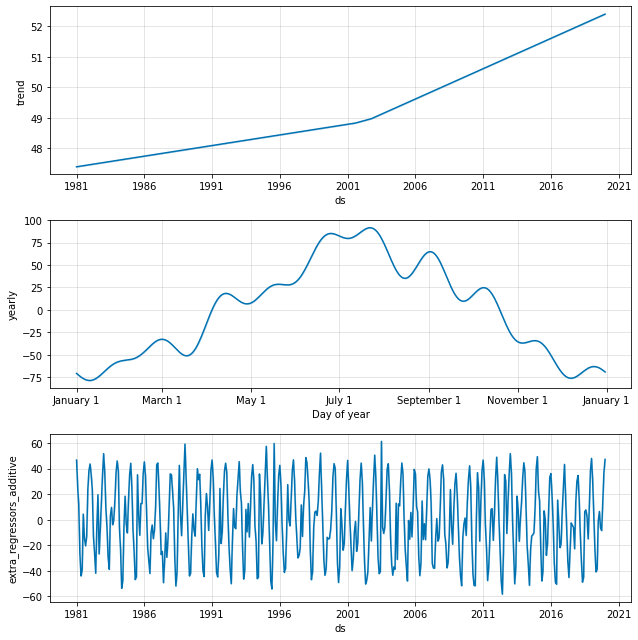

In [189]:
fig4 = m2.plot_components(forecast_a)

In [190]:
forecast_2019 = forecast_a.tail(12)
forecast_2019["Month"] = forecast_2019["ds"].dt.month
print (forecast_2019[["yhat"]].shape,conditions_val[["avg_temp"]].shape)
test = pd.merge(conditions_val[["aet(mm)","Month"]],forecast_2019[["yhat","Month"]])
# cols = ['ds','actual','yhat']
from sklearn.metrics import mean_squared_error
print (mean_squared_error(test["aet(mm)"], test["yhat"]))
test

/home/susiejojo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(12, 1) (12, 1)
1797.8152098601256


,aet(mm),Month,yhat
0,33,1,25.209328
1,34,2,24.282247
2,23,3,10.057634
3,26,4,18.338781
4,10,5,42.996087
5,12,6,134.724267
6,158,7,136.991926
7,145,8,109.712697
8,109,9,58.080899
9,52,10,34.106415
